In [1]:
import sys
import os
from pathlib import Path

sys.path.append(sys.path[0] + '/src')

In [2]:
import utils
import pandas as pd
from prediction import analyze_data, plot_count, count_data, plot_multi_count, part_task_analysis

In [3]:
device = utils.getting_device()

train_df =pd.read_csv('data/train_24892.csv')
test_df = pd.read_csv('data/test_13786.csv')
print(train_df.shape, test_df.shape)

device: cuda
(24892, 4) (13786, 4)


In [42]:
from prediction import predict_two, caculate_acc, part_data_analysis, part_task_analysis

languages = ['Go','Java','JavaScript','PHP','Python','Ruby']
model = 'bert'
train_file = 'out/'+model+'_24892.pt'
test_file = 'out/'+model+'_13786.pt'

part_data_analysis(languages, train_df, test_df, train_file, test_file)


Time elapsed: 0.06 seconds, Data predicted: 0
Accuracy of Programming Language prediction: 84.81%
Accuracy of Programming Task prediction: 19.02%


In [43]:
languages = ['Go','Java','C++','Kotlin','Python','Julia']
model = 'gpt'
train_file = 'out/'+model+'_24892.pt'
test_file = 'out/'+model+'_13786.pt'

part_data_analysis(languages, train_df, test_df, train_file, test_file)


Time elapsed: 0.07 seconds, Data predicted: 0
Accuracy of Programming Language prediction: 77.93%
Accuracy of Programming Task prediction: 8.34%


## Experiment 2:

In [4]:
all_tasks = train_df['task'].value_counts().nlargest(50).index.tolist()
all_langs = train_df['language'].value_counts().nlargest(50).index.tolist()
num_task = [i for i in range (10,51,10)]
num_task

[10, 20, 30, 40, 50]

In [5]:
train_df =pd.read_csv('data/train_24892.csv')
test_df = pd.read_csv('data/test_13786.csv')
print(train_df.shape, test_df.shape)

(24892, 4) (13786, 4)


In [6]:
models = ['bert', 'gpt' , 'codebert' , 'codegpt' , 'roberta', 'gpt4']
results_dic = dict.fromkeys(models)
chosen_dic = dict.fromkeys(num_task)
for m in models:
    results_dic[m] = {'pl_acc':[], 'pt_acc':[]}

for num in num_task:
    chosen_dic[num] = {'chosen_lang':[], 'chosen_task':[]}

In [9]:
print(len(all_tasks), len(all_langs))

50 50


In [7]:
import random
from prediction import part_analysis

for i in num_task:
    for j in range(10):
        chosen_task = random.choices(all_tasks, k = i)
        chosen_lang = random.choices(all_langs, k = i)
        chosen_dic[i]['chosen_lang'].append(chosen_lang)
        chosen_dic[i]['chosen_task'].append(chosen_task)
        # print(chosen_task)
        # print(chosen_lang)
        for model in models:
            train_file = 'out/'+model+'_24892.pt'
            test_file = 'out/'+model+'_13786.pt'
            pl_acc, pt_acc = part_analysis(chosen_task, chosen_lang, train_df, test_df, train_file, test_file)
            print('Model:{}, Num_task:{}, Round:{}, PL_ACC:{}, PT_ACC:{}'.format(model, i, j, pl_acc, pt_acc))
            results_dic[model]['pl_acc'].append(pl_acc)
            results_dic[model]['pt_acc'].append(pt_acc)
        print('========================================================')

The number of tasks:10, Number of Languages:10, Sizeof chosen train:torch.Size([129, 768]), Sizeof Chosen test:torch.Size([47, 768])
Time elapsed: 0.01 seconds, Data predicted: 1
Model:bert, Num_task:10, Round:0, PL_ACC:65.96, PT_ACC:44.68
The number of tasks:10, Number of Languages:10, Sizeof chosen train:torch.Size([129, 768]), Sizeof Chosen test:torch.Size([47, 768])
Time elapsed: 0.00 seconds, Data predicted: 1
Model:gpt, Num_task:10, Round:0, PL_ACC:40.43, PT_ACC:27.66
The number of tasks:10, Number of Languages:10, Sizeof chosen train:torch.Size([129, 768]), Sizeof Chosen test:torch.Size([47, 768])
Time elapsed: 0.00 seconds, Data predicted: 1
Model:codebert, Num_task:10, Round:0, PL_ACC:48.94, PT_ACC:19.15
The number of tasks:10, Number of Languages:10, Sizeof chosen train:torch.Size([129, 768]), Sizeof Chosen test:torch.Size([47, 768])
Time elapsed: 0.00 seconds, Data predicted: 1
Model:codegpt, Num_task:10, Round:0, PL_ACC:63.83, PT_ACC:53.19
The number of tasks:10, Number of 

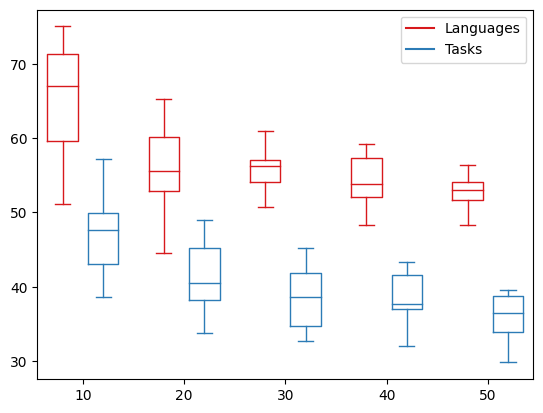

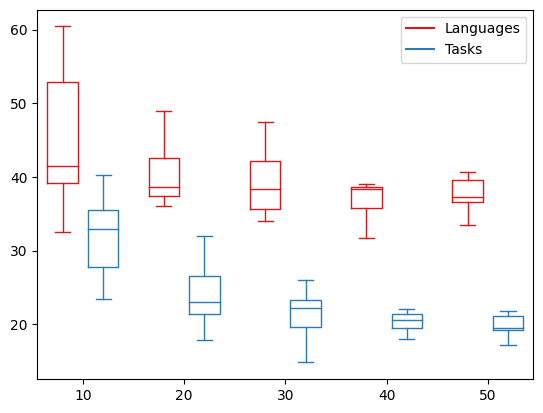

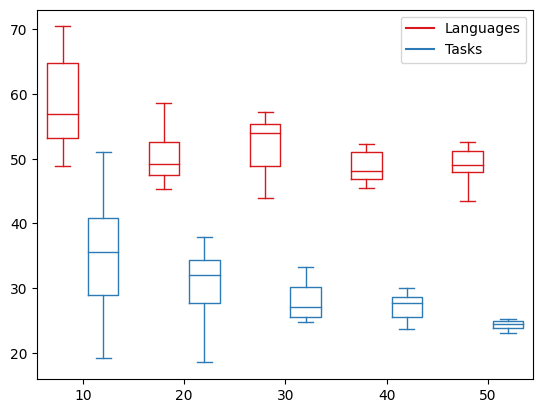

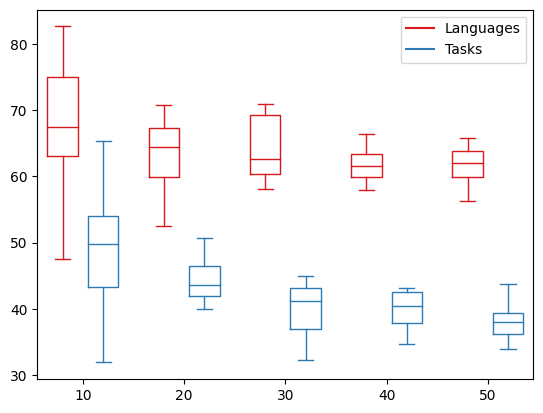

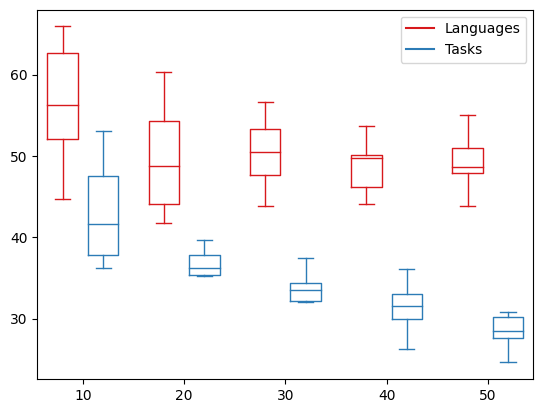

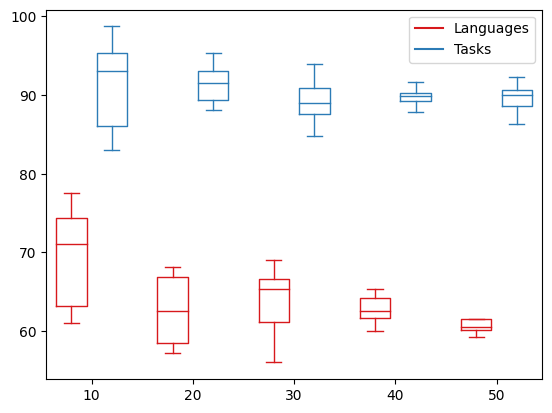

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def chunks(xs, n):
    n = max(1, n)
    return (xs[i:i+n] for i in range(0, len(xs), n))

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

def plot_box(acc_pl, acc_pt, num_task, model):
    plt.figure()
    
    bpl = plt.boxplot(acc_pl, positions=np.array(range(len(acc_pl)))*2.0-0.4, sym='', widths=0.6)
    bpr = plt.boxplot(acc_pt, positions=np.array(range(len(acc_pt)))*2.0+0.4, sym='', widths=0.6)
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    
    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='#D7191C', label='Languages')
    plt.plot([], c='#2C7BB6', label='Tasks')
    plt.legend()
    
    plt.xticks(range(0, 10, 2), num_task)
    
    plt.savefig('image/'+model + '_box.png')

for model in models:
    acc_pl = results_dic[model]['pl_acc']
    acc_pl = list(chunks(acc_pl, 10))

    acc_pt = results_dic[model]['pt_acc']
    acc_pt = list(chunks(acc_pt, 10))

    plot_box(acc_pl, acc_pt, num_task, model)

In [15]:
import random

for i in num_task:
    for j in range(10):
        chosen_task = random.choices(all_tasks, k = i)
        chosen_lang = random.choices(all_langs, k = i)
        chosen_dic[i]['chosen_lang'].append(chosen_lang)
        chosen_dic[i]['chosen_task'].append(chosen_task)
        print(chosen_task)
        print(chosen_lang)
        for model in models:
            train_file = 'out/'+model+'_24892.pt'
            test_file = 'out/'+model+'_13786.pt'
            pl_acc, pt_acc = part_task_analysis(chosen_task, train_df, test_df, train_file, test_file)
            print('Model:{}, Num_task:{}, Round:{}, PL_ACC:{}, PT_ACC:{}'.format(model, i, j, pl_acc, pt_acc))
            results_dic[model]['pl_acc'].append(pl_acc)
            results_dic[model]['pt_acc'].append(pt_acc)
        print('========================================================')

['Comments', 'Sorting-algorithms-Quicksort', 'Fibonacci-sequence', 'Filter', 'Hello-world-Text', 'A+B', 'FizzBuzz', 'Hamming-numbers', 'Apply-a-callback-to-an-array', 'Loops-Foreach']
['Common-Lisp', 'ALGOL-68', 'OCaml', 'Sidef', 'Julia', 'Phix', 'F-Sharp', 'Nim', 'F-Sharp', 'Python']
Time elapsed: 0.02 seconds, Data predicted: 1
Model:bert, Num_task:10, Round:0, PL_ACC:34.15, PT_ACC:54.47
Time elapsed: 0.02 seconds, Data predicted: 1
Model:gpt, Num_task:10, Round:0, PL_ACC:18.16, PT_ACC:34.28
Time elapsed: 0.02 seconds, Data predicted: 1
Model:codebert, Num_task:10, Round:0, PL_ACC:25.2, PT_ACC:41.87
Time elapsed: 0.02 seconds, Data predicted: 1
Model:codegpt, Num_task:10, Round:0, PL_ACC:36.31, PT_ACC:59.35
Time elapsed: 0.02 seconds, Data predicted: 1
Model:roberta, Num_task:10, Round:0, PL_ACC:28.46, PT_ACC:46.07
Time elapsed: 0.13 seconds, Data predicted: 1
Model:gpt4, Num_task:10, Round:0, PL_ACC:44.58, PT_ACC:93.77
['Flow-control-structures', 'Ackermann-function', 'Collections',

In [23]:
import statistics

for model in models:
    acc_pl = results_dic[model]['pl_acc']
    acc_pl = list(chunks(acc_pl, 10))

    acc_pt = results_dic[model]['pt_acc']
    acc_pt = list(chunks(acc_pt, 10))
    
    print(results_dic[model]['pl_acc'][:10])
    print(results_dic[model]['pt_acc'][:10])

    print(statistics.median(results_dic[model]['pl_acc'][:10]))
    print(statistics.median(results_dic[model]['pt_acc'][:10]))
    

[34.15, 30.41, 30.03, 27.56, 27.14, 29.16, 32.61, 27.27, 38.57, 32.84]
[54.47, 64.94, 60.53, 52.51, 61.93, 52.48, 59.51, 58.71, 47.16, 56.16]
30.22
57.435
[18.16, 15.56, 16.51, 15.25, 12.75, 17.71, 15.77, 17.93, 21.11, 21.51]
[34.28, 39.53, 41.82, 38.13, 41.89, 32.4, 36.94, 37.12, 29.69, 34.65]
17.11
37.03
[25.2, 28.26, 25.16, 23.92, 20.04, 25.49, 25.81, 23.23, 34.35, 32.02]
[41.87, 47.23, 50.63, 43.67, 44.26, 42.12, 40.03, 44.82, 38.86, 40.72]
25.345
42.894999999999996
[36.31, 38.46, 36.48, 33.62, 28.78, 36.07, 35.86, 33.21, 43.67, 41.54]
[59.35, 62.08, 65.72, 56.5, 63.75, 58.53, 57.19, 59.34, 49.34, 53.53]
36.19
58.935
[28.46, 28.8, 26.42, 24.44, 23.86, 26.57, 30.45, 23.99, 35.66, 31.03]
[46.07, 55.1, 57.23, 49.57, 52.46, 51.84, 48.69, 51.26, 42.21, 48.11]
27.515
50.415
[44.58, 42.75, 45.91, 46.45, 36.79, 44.92, 43.43, 43.43, 51.24, 50.57]
[93.77, 94.81, 94.34, 92.55, 94.72, 96.54, 92.27, 94.19, 95.05, 94.09]
44.75
94.265


In [24]:
print(chosen_dic[10]['chosen_lang'][2])

['C-sharp', 'PowerShell', 'Julia', 'Groovy', 'Java', 'Tcl', 'Go', 'Swift', 'ALGOL-68', 'Common-Lisp']


In [25]:
print(chosen_dic[10]['chosen_lang'][3])

['Clojure', 'Mathematica', 'Perl', 'R', 'Groovy', 'C', 'C++', 'Mathematica', 'Rust', 'Factor']


In [26]:
print(chosen_dic[10]['chosen_lang'][4])

['Zkl', 'Raku', 'PowerShell', 'PHP', 'Scala', 'ALGOL-68', 'Ada', 'MATLAB', 'Common-Lisp', 'Sidef']
